# Importaciones necesarias

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.image as image
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps
import matplotlib.cbook as cbook
import matplotlib.image as image

In [2]:
# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

In [3]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [4]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
piloto1 = input('Piloto 1: ')
piloto2 = input('Piloto 2: ')

Año: 2022
Round: 21
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: PER
Piloto 2: VER


# Carga de la sesión

In [5]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '55', '16', '14', '1', '11', '31', '77', '18', '5', '24', '47', '10', '23', '6', '22', '4', '20', '3']


# Listado de pilotos

In [6]:
drivers = pd.unique(session.laps['Driver'])
drivers
# seleccionar un solo piloto drivers[0] - SAI

array(['RUS', 'HAM', 'SAI', 'LEC', 'ALO', 'VER', 'PER', 'OCO', 'BOT',
       'STR', 'VET', 'ZHO', 'MSC', 'GAS', 'ALB', 'LAT', 'TSU', 'NOR',
       'MAG', 'RIC'], dtype=object)

# Listado de Equipos

In [7]:
teams = pd.unique(session.laps['Team'])
teams

array(['Mercedes', 'Ferrari', 'Alpine', 'Red Bull Racing', 'Alfa Romeo',
       'Aston Martin', 'Haas F1 Team', 'AlphaTauri', 'Williams',
       'McLaren'], dtype=object)

In [8]:
session.results[0:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,1.0,1.0,NaT,NaT,NaT,0 days 01:38:34.044000,Finished,26.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,2.0,2.0,NaT,NaT,NaT,0 days 01:38:35.573000,Finished,18.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,7.0,NaT,NaT,NaT,0 days 01:38:38.095000,Finished,15.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,4.0,5.0,NaT,NaT,NaT,0 days 01:38:42.485000,Finished,12.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,5.0,17.0,NaT,NaT,NaT,0 days 01:38:43.605000,Finished,10.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,6.0,3.0,NaT,NaT,NaT,0 days 01:38:44.100000,Finished,8.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,7.0,4.0,NaT,NaT,NaT,0 days 01:38:48.124000,Finished,6.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,8.0,16.0,NaT,NaT,NaT,0 days 01:38:52.734000,Finished,4.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,9.0,14.0,NaT,NaT,NaT,0 days 01:38:56.596000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,10.0,15.0,NaT,NaT,NaT,0 days 01:38:57.596000,Finished,1.0


# tabla de vueltas más rápidas

In [9]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

/opt/anaconda3/lib/python3.9/site-packages/fastf1/core.py:2165: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


In [10]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [11]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     RUS 0 days 00:01:13.785000        0 days 00:00:00
1     HAM 0 days 00:01:13.942000 0 days 00:00:00.157000
2     SAI 0 days 00:01:13.953000 0 days 00:00:00.168000
3     ALO 0 days 00:01:14.164000 0 days 00:00:00.379000
4     VER 0 days 00:01:14.195000 0 days 00:00:00.410000
5     LEC 0 days 00:01:14.253000 0 days 00:00:00.468000
6     PER 0 days 00:01:14.283000 0 days 00:00:00.498000
7     STR 0 days 00:01:14.831000 0 days 00:00:01.046000
8     OCO 0 days 00:01:15.093000 0 days 00:00:01.308000
9     MSC 0 days 00:01:15.251000 0 days 00:00:01.466000
10    LAT 0 days 00:01:15.327000 0 days 00:00:01.542000
11    GAS 0 days 00:01:15.327000 0 days 00:00:01.542000
12    TSU 0 days 00:01:15.508000 0 days 00:00:01.723000
13    BOT 0 days 00:01:15.511000 0 days 00:00:01.726000
14    VET 0 days 00:01:15.549000 0 days 00:00:01.764000
15    ALB 0 days 00:01:15.613000 0 days 00:00:01.828000
16    ZHO 0 days 00:01:15.802000 0 days 00:00:02

In [12]:
# Graficador

In [14]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    print(lap['Team'])
    if pd.isnull(lap['Team']):
        color = '#000000'
    else:
        color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

Mercedes
Mercedes
Ferrari
Alpine
Red Bull Racing
Ferrari
Red Bull Racing
Aston Martin
Alpine
Haas F1 Team
Williams
AlphaTauri
AlphaTauri
Alfa Romeo
Aston Martin
Williams
Alfa Romeo
McLaren
NaT
NaT


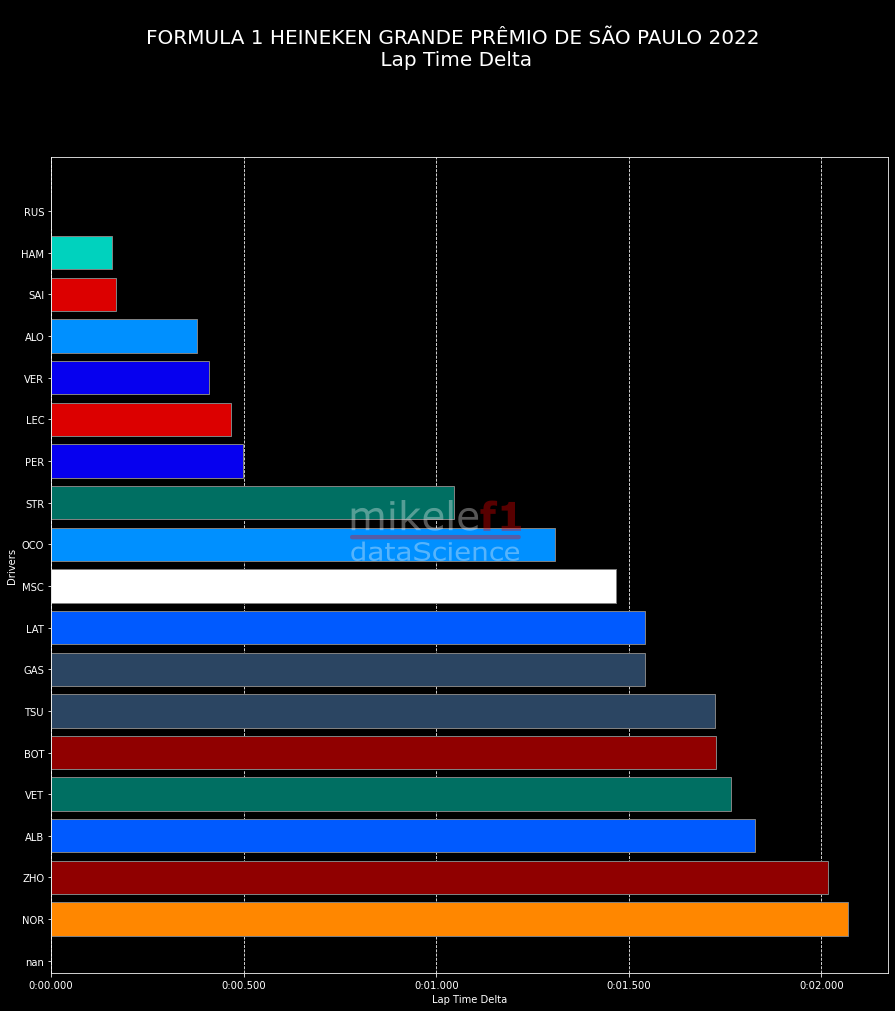

In [16]:
#with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
#    im = image.imread(file)

im = image.imread('./images/logog.png')
    #Modo oscuro
plt.style.use('dark_background')

fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [15, 15]

# Etiquetas Verticales | Pilotos
ax.set_yticks(fastest_laps.index,labels=fastest_laps['Driver'])
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')

ax.invert_yaxis()
# Etiquetas
ax.set_ylabel('Drivers')
ax.set_xlabel('Lap Time Delta')
session.event
#ax.set_title(session.event['OfficialEventName'])
plt.suptitle(f"\n{session.event['OfficialEventName']} \n Lap Time Delta \n"
             , size=20, y=1.02)
# Barras
# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='white', zorder=-1000)

#fig.figimage(im, 3, 3, zorder=13, alpha=.35)
fig.figimage(im, xo=350, yo=450, zorder=13, alpha=.35)

nombrearchivo = str(year)+'-'+str(wknd)+'-LTD-'+ses+'.png'
plt.savefig(nombrearchivo)

#Mostrar gráfico
#plt.savefig('2022-13-RLTD.png')
plt.show()